In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from rdkit import Chem
from ast import literal_eval
from collections import Counter

In [28]:
# plot tsne using matplotlib
def plot_tsne(df, color_by):

    # clear plot
    plt.clf()
    # plot tsne, coloring dots that contain the term color_by in the set df["summarizations"]
    
    # create figure, plotting non-color_by labels in gray
    plt.scatter(df[df['summarizations'].apply(lambda x: color_by not in x)]['chemberta_tsne_x'],
                df[df['summarizations'].apply(lambda x: color_by not in x)]['chemberta_tsne_y'],
                c="gray",
                # marker=".",
                s=1,
                edgecolors="none",
    )
    
    # # overlay with red colored dots for color_by
    plt.scatter(df[df['summarizations'].apply(lambda x: color_by in x)]['chemberta_tsne_x'],
                df[df['summarizations'].apply(lambda x: color_by in x)]['chemberta_tsne_y'],
                c="red",
                # marker=".",
                s=1,
                edgecolors="none",
    )

    # add labels
    plt.xlabel("tsne_x")
    plt.ylabel("tsne_y")
    plt.title("tsne colored by " + color_by)

    # save plot
    plt.savefig("cb_tsne_s42_p50_euc_" + color_by + ".png", dpi=600, bbox_inches='tight')

In [3]:
df = pd.read_pickle("schembl_summs_v4_final_with_chemberta_tsne.pkl")
df["summarizations"] = df["summarizations"].apply(literal_eval)

In [4]:
all_terms = Counter()
for i in df["summarizations"]:
    all_terms.update(i)

for term, count in all_terms.most_common():
    print(term, count)

inhibitor 36180
treatment 32353
disease 15995
compound 14633
derivative 13026
cancer 11346
receptor 9906
disorder 9305
modulator 8465
agent 7610
therapeutic 7324
antagonist 7205
kinase 6977
composition 6254
pharmaceutical 5832
organic 5089
agonist 4428
inflammatory 4228
protein 4175
inhibitory 3708
activity 3685
device 3571
acid 3291
antiviral 3097
cell 2916
pain 2831
diabetes 2798
inhibition 2776
therapy 2753
anti-inflammatory 2625
high 2504
heterocyclic 2494
prevention 2367
antibacterial 2259
cardiovascular 2148
medicament 2084
material 2062
drug 2041
synthesis 1985
autoimmune 1978
treating 1876
inflammation 1824
control 1821
efficiency 1773
obesity 1772
electroluminescent 1726
pharmacological 1706
neurodegenerative 1705
novel 1676
light-emitting 1663
metabolic 1662
selective 1628
alzheimer's 1543
light 1520
protease 1515
channel 1505
ligand 1454
substituted 1448
neurological 1447
modulation 1441
infection 1434
hiv 1363
regulation 1353
production 1350
analgesic 1341
intermediate 1333

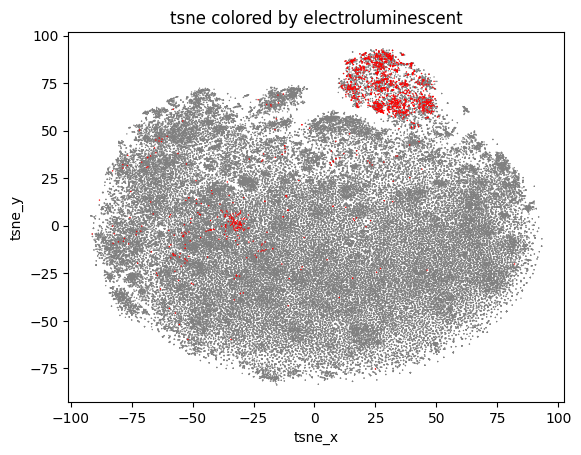

In [29]:
plot_tsne(df, "opioid")
plot_tsne(df, "antibiotic")
plot_tsne(df, "protease")
plot_tsne(df, "peptidase")
plot_tsne(df, "antiviral")
plot_tsne(df, "antipsychotic")
plot_tsne(df, "serotonin")
plot_tsne(df, '5-ht')
plot_tsne(df, 'kinase')
plot_tsne(df, 'cancer')
plot_tsne(df, 'diabetes')
plot_tsne(df, 'antibacterial')
plot_tsne(df, "alzheimer's")
plot_tsne(df, "neurological")
plot_tsne(df, "infection")
plot_tsne(df, "hiv")
plot_tsne(df, "analgesic")
plot_tsne(df, "electroluminescent")


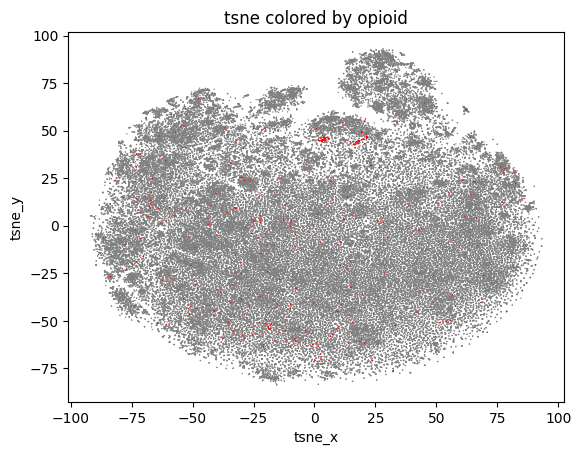

In [27]:
plot_tsne(df, "opioid")


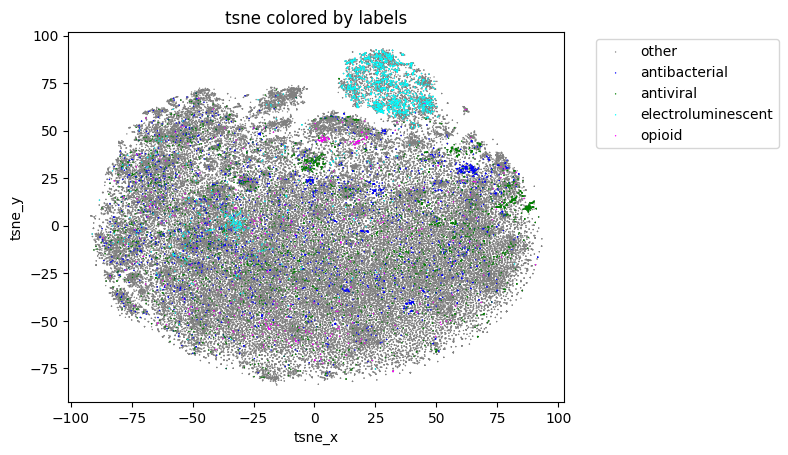

In [32]:

# clear plot
plt.clf()
# plot tsne, coloring dots that contain the term color_by in the set df["summarizations"]

# create figure, plotting non-color_by labels in gray
plt.scatter(df['chemberta_tsne_x'],
            df['chemberta_tsne_y'],
            c="gray",
            # marker=".",
            s=1,
            edgecolors="none",
)


plt.scatter(df[df['summarizations'].apply(lambda x: "antibacterial" in x)]['chemberta_tsne_x'],
            df[df['summarizations'].apply(lambda x: "antibacterial" in x)]['chemberta_tsne_y'],
            c="blue",
            # marker=".",
            s=1,
            edgecolors="none",
)

plt.scatter(df[df['summarizations'].apply(lambda x: "antiviral" in x)]['chemberta_tsne_x'],
            df[df['summarizations'].apply(lambda x: "antiviral" in x)]['chemberta_tsne_y'],
            c="green",
            # marker=".",
            s=1,
            edgecolors="none",
)


plt.scatter(df[df['summarizations'].apply(lambda x: "electroluminescent" in x)]['chemberta_tsne_x'],
            df[df['summarizations'].apply(lambda x: "electroluminescent" in x)]['chemberta_tsne_y'],
            c="cyan",
            # marker=".",
            s=1,
            edgecolors="none",
)

plt.scatter(df[df['summarizations'].apply(lambda x: "opioid" in x)]['chemberta_tsne_x'],
            df[df['summarizations'].apply(lambda x: "opioid" in x)]['chemberta_tsne_y'],
            c="magenta",
            # marker=".",
            s=1,
            edgecolors="none",
)

# add labels
plt.xlabel("tsne_x")
plt.ylabel("tsne_y")
plt.title("tsne colored by labels")
# legend outside of plot, colors shown bigger
plt.legend(["other", "antibacterial", "antiviral", "electroluminescent", "opioid"], loc='upper left', bbox_to_anchor=(1.05, 1), )

# save plot
plt.savefig("cb_tsne_s42_p50_many_labels.png", dpi=600, bbox_inches='tight')

In [38]:
df_explode = df.explode('summarizations')

In [41]:
from rdkit.Chem import PandasTools
df_mol = df
PandasTools.AddMoleculeColumnToFrame(df_mol, smilesCol='smiles')
df_mol.head()

[14:59:01] WARNING: not removing hydrogen atom without neighbors
[14:59:02] WARNING: not removing hydrogen atom without neighbors
[14:59:08] WARNING: not removing hydrogen atom without neighbors
[14:59:12] WARNING: not removing hydrogen atom without neighbors
[14:59:13] WARNING: not removing hydrogen atom without neighbors
[14:59:14] WARNING: not removing hydrogen atom without neighbors
[14:59:16] WARNING: not removing hydrogen atom without neighbors
[14:59:17] WARNING: not removing hydrogen atom without neighbors
[14:59:18] WARNING: not removing hydrogen atom without neighbors
[14:59:19] WARNING: not removing hydrogen atom without neighbors
[14:59:22] WARNING: not removing hydrogen atom without neighbors
[14:59:22] WARNING: not removing hydrogen atom without neighbors


,canon_smiles,Unnamed: 0.1,Unnamed: 0,smiles,cid,patent_ids,summarizations,features,chemberta_tsne_x,chemberta_tsne_y,ROMol
0,CC1(O)CCC2(CC1)CS(=O)(=NC1CC1)C2,0,0,CC1(O)CCC2(CC1)CS(=O)(=NC1CC1)C2,166827938,"{'WO-2022146698-A1', 'US-11168102-B1'}","[pharmaceutical, disease, treatment, sos1, com...","[-1.200067162513733, 0.2316664755344391, 0.028...",-36.648537,-46.220360,<rdkit.Chem.rdchem.Mol object at 0x7fbb3521ed50>
1,CCC(C)(C)N1C(=O)CC(=O)NC1=O,1,1,CCC(C)(C)N1C(=O)CC(=O)NC1=O,23616245,{'US-4382983-A'},"[film, abrasion-resistant, heat-curing, coating]","[-0.7962380647659302, -1.020204782485962, 1.29...",-59.986599,24.359055,<rdkit.Chem.rdchem.Mol object at 0x7fbb3521ce40>
2,COC(=O)C(Cc1ccc(-c2ccc(C#N)cc2)cc1)NC(=O)C1Cc2...,2,2,COC(=O)[C@H](Cc1ccc(-c2ccc(C#N)cc2)cc1)NC(=O)[...,87122932,"{'US-2011160198-A1', 'US-2013096150-A1', 'WO-2...","[receptor, agonist, glp-1, diabetes, molecule,...","[1.3158009052276611, -0.08092622458934784, 0.0...",66.247482,4.499098,<rdkit.Chem.rdchem.Mol object at 0x7fbb3521cc80>
3,OC(CN1CCN(c2ccccc2)CC1)c1nnc(S)n1-c1ccccc1,3,3,OC(CN1CCN(c2ccccc2)CC1)c1nnc(S)n1-c1ccccc1,20244505,"{'US-4577020-A', 'US-4338453-A'}","[anti-allergy, analgesic, antihypertensive, an...","[-0.6025227308273315, -0.051358405500650406, 0...",-27.476458,-8.499907,<rdkit.Chem.rdchem.Mol object at 0x7fbb3521daf0>
4,CN1CCN(C2CCC(n3nc(-c4cccc(Oc5ccccc5C=O)c4)c4c(...,4,4,CN1CCN(C2CCC(n3nc(-c4cccc(Oc5ccccc5C=O)c4)c4c(...,88024689,"{'WO-0119829-A2', 'EP-1212327-A2', 'EP-1212327...","[kinase, inhibitor, protein]","[0.3550434112548828, -0.9825844168663025, 0.31...",49.641129,-39.215027,<rdkit.Chem.rdchem.Mol object at 0x7fbb3521d8c0>


In [44]:
# scatter plot using plotly
import plotly.express as px

def scatter_plot_px(df: pd.DataFrame,):
    """
    
    """
    
    fig = px.scatter(
            data_frame=df,
            x="chemberta_tsne_x",
            y="chemberta_tsne_y",
            # color='summarizations',
            title=f't-sne of chemberta embeddings w/ ChAPL labels',
            # hover_data=('ROMol', 'smiles', 'summarizations'),
            opacity = 1,
            # size=0.5,
        )
    fig.update_traces(hoverinfo="none", hovertemplate=None)
    fig.update_layout(
        plot_bgcolor='rgba(255,255,255,0.1)'
    )




    fig.write_html(file="cb_tsne_s42_p50_euc_plotly.html")

scatter_plot_px(df=df_mol)

TypeError: Object of type Mol is not JSON serializable